#Task - 05

**Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.**


# Loading Libraries and Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('/content/US_Accidents_June-20.csv')

In [9]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201,3,08-02-2016 05:46,08-02-2016 11:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201,2,08-02-2016 06:07,08-02-2016 06:37,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201,2,08-02-2016 06:49,08-02-2016 07:19,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201,3,08-02-2016 07:23,08-02-2016 07:53,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201,2,08-02-2016 07:39,08-02-2016 08:09,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [37]:
df.columns


Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [38]:
df.dtypes.value_counts()

,count
object,21
float64,13
bool,13
int64,2


In [39]:
df.shape

(10026, 49)

In [40]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,10026.000000,10026.000000,10026.000000,10026.000000,0.0,0.0,10026.000000,3688.000000,9869.000000,4607.000000,9867.000000,9893.000000,9750.000000,8721.000000,1502.000000
mean,209.138540,2.383503,41.768564,-95.829239,NaN,NaN,0.109341,4384.373915,46.123822,27.713762,64.639809,30.017879,9.004585,10.272377,0.070160
std,20.256403,0.488923,3.430300,22.399065,NaN,NaN,0.918366,10978.642278,16.165335,10.009301,22.709095,0.263692,2.566744,5.405685,0.679641
min,200.000000,1.000000,29.360785,-123.802567,NaN,NaN,0.000000,1.000000,2.500000,-8.900000,7.000000,28.620000,0.100000,1.200000,0.000000
25%,201.000000,2.000000,39.746665,-122.047453,NaN,NaN,0.010000,412.000000,34.000000,22.800000,47.000000,29.870000,10.000000,5.800000,0.000000
50%,201.000000,2.000000,41.149047,-83.772506,NaN,NaN,0.010000,1601.500000,44.100000,28.900000,65.000000,30.000000,10.000000,9.200000,0.010000
75%,201.000000,3.000000,42.949429,-73.915751,NaN,NaN,0.010000,5001.000000,57.200000,34.750000,85.000000,30.200000,10.000000,13.800000,0.030000
max,406.000000,4.000000,48.199970,-70.573624,NaN,NaN,39.030000,311416.000000,100.400000,66.000000,100.000000,30.950000,30.000000,40.300000,10.000000


# Shape of original data

In [44]:
df1=df[df['State']=='CA']

In [46]:
df1 = df1.copy()


In [47]:
df1['IDD'] = df1['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


In [48]:
df1

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
728,A-729,MapQuest,201,3,21-06-2016 10:34,21-06-2016 11:04,38.085300,-122.233017,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,729
729,A-730,MapQuest,201,3,21-06-2016 10:30,21-06-2016 11:16,37.631813,-122.084167,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,730
730,A-731,MapQuest,201,2,21-06-2016 10:49,21-06-2016 11:19,37.896564,-122.070717,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,731
731,A-732,MapQuest,201,3,21-06-2016 10:41,21-06-2016 11:11,37.334255,-122.032471,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,732
732,A-733,MapQuest,201,2,21-06-2016 10:16,21-06-2016 11:04,37.250729,-121.910713,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,A-37212,MapQuest,201,3,03-05-2016 15:24,03-05-2016 16:39,37.851658,-121.282875,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,37212
2951,A-37213,MapQuest,201,2,03-05-2016 15:25,03-05-2016 16:40,37.792980,-121.190254,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,37213
2952,A-37214,MapQuest,201,2,03-05-2016 15:36,03-05-2016 16:21,38.375622,-122.713432,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,37214
2953,A-37215,MapQuest,201,3,03-05-2016 15:30,03-05-2016 16:15,37.989220,-122.312645,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,37215


In [49]:
df1.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
728,A-729,MapQuest,201,3,21-06-2016 10:34,21-06-2016 11:04,38.085300,-122.233017,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,729
729,A-730,MapQuest,201,3,21-06-2016 10:30,21-06-2016 11:16,37.631813,-122.084167,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,730
730,A-731,MapQuest,201,2,21-06-2016 10:49,21-06-2016 11:19,37.896564,-122.070717,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,731
731,A-732,MapQuest,201,3,21-06-2016 10:41,21-06-2016 11:11,37.334255,-122.032471,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,732
732,A-733,MapQuest,201,2,21-06-2016 10:16,21-06-2016 11:04,37.250729,-121.910713,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,733


In [50]:
df1.shape

(2227, 50)

In [51]:
df1.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'IDD'],
      dtype='object')

In [52]:
df1.duplicated().sum()

0

In [53]:
d1f=df1.dropna(subset=['Precipitation(in)'])

In [54]:
df1.shape

(2227, 50)

In [55]:
df1=df1.dropna(subset=['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                      'Weather_Condition'])

In [56]:
df1.shape

(12, 50)

In [57]:
df1.isna().sum()/len(df1)*100

,0
ID,0.000000
Source,0.000000
TMC,0.000000
Severity,0.000000
Start_Time,0.000000
End_Time,0.000000
Start_Lat,0.000000
Start_Lng,0.000000
End_Lat,100.000000
End_Lng,100.000000


In [58]:
df1=df1.dropna(subset=['City','Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])

In [59]:
df1.isna().sum()/len(df1)*100

,0
ID,0.000000
Source,0.000000
TMC,0.000000
Severity,0.000000
Start_Time,0.000000
End_Time,0.000000
Start_Lat,0.000000
Start_Lng,0.000000
End_Lat,100.000000
End_Lng,100.000000


In [60]:
df1['Weather_Condition'].value_counts()

,count
Weather_Condition,
Overcast,6
Clear,3
Mostly Cloudy,2
Partly Cloudy,1


In [61]:
df1.Side.unique()

array(['R', 'L'], dtype=object)

In [62]:
df_cat=df1.select_dtypes('object')
df_num=df1.select_dtypes(np.number)
df_cat=df_cat.drop('ID',axis=1)

In [63]:
df_cat=df1.select_dtypes('object')
col_name=[]
length=[]

for i in df_cat.columns:
    col_name.append(i)
    length.append(len(df_cat[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,ID,12
1,Source,1
2,Start_Time,12
3,End_Time,12
4,Description,12
5,Street,11
6,Side,2
7,City,9
8,County,6
9,State,1


In [64]:
df1.drop(['Description','Zipcode','Weather_Timestamp'],axis=1,inplace=True)

In [65]:
del df1['Airport_Code']

In [66]:
df_num.columns

Index(['TMC', 'Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'IDD'],
      dtype='object')

In [67]:
len(df_num.columns)


16

In [68]:
df_num=df1.select_dtypes(np.number)
col_name=[]
length=[]

for i in df_num.columns:
    col_name.append(i)
    length.append(len(df_num[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,TMC,3
1,Severity,2
2,Start_Lat,12
3,Start_Lng,12
4,End_Lat,1
5,End_Lng,1
6,Distance(mi),2
7,Number,10
8,Temperature(F),4
9,Wind_Chill(F),9


<Axes: >

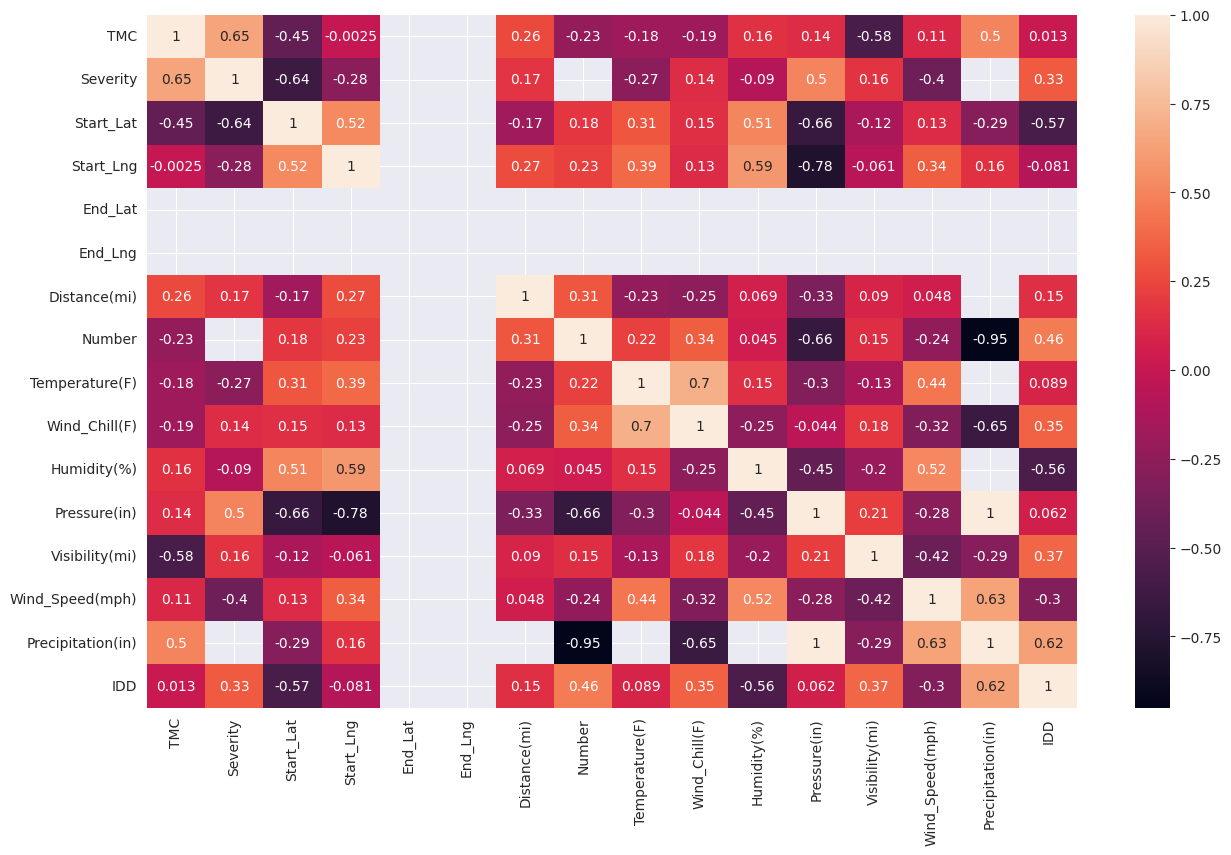

In [69]:
plt.figure(figsize=(15 ,9))
sns.heatmap(df_num.corr() , annot=True)

In [70]:
cities = df1['City'].unique()
len(cities)

9

In [71]:
accidents_by_cities = df1['City'].value_counts()
accidents_by_cities

,count
City,
Placerville,3
Shingle Springs,2
Grass Valley,1
Nevada City,1
Rough And Ready,1
Penngrove,1
Vallejo,1
Livermore,1
Pine Grove,1


In [91]:
accidents_by_cities[:10]

,count
City,
Placerville,3
Shingle Springs,2
Grass Valley,1
Nevada City,1
Rough And Ready,1
Penngrove,1
Vallejo,1
Livermore,1
Pine Grove,1


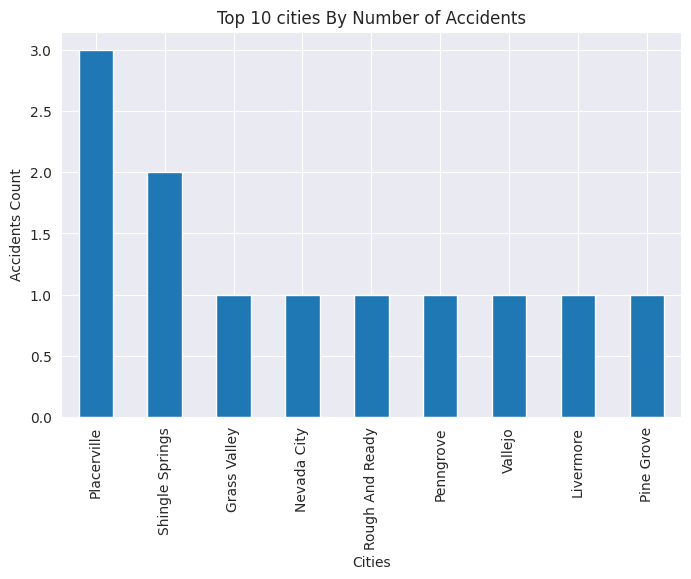

In [72]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In [92]:
accidents_severity = df1.groupby('Severity').count()['ID']
accidents_severity

,ID
Severity,
2,11
3,1


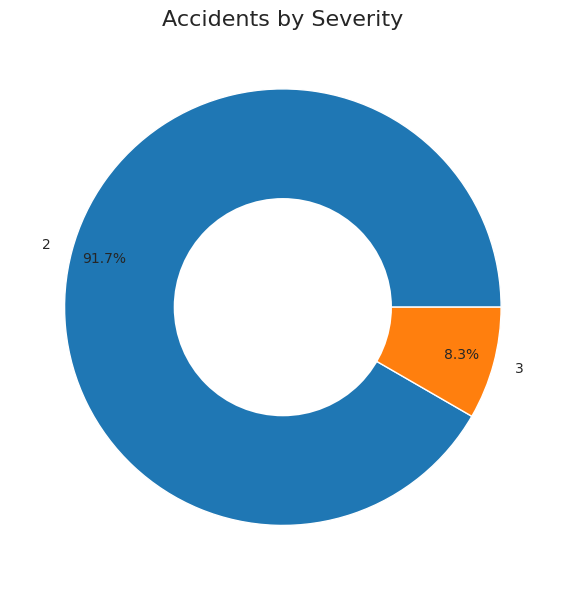

In [94]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(accidents_severity, labels=accidents_severity.index,
    autopct='%1.1f%%',
    pctdistance=0.85
)

circle = plt.Circle((0, 0), 0.5, color='white', linewidth=0)
ax.add_artist(circle)
ax.set_title("Accidents by Severity", fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

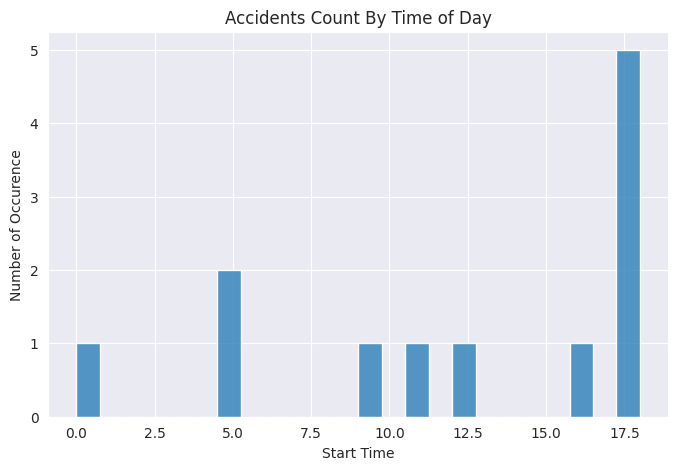

In [77]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

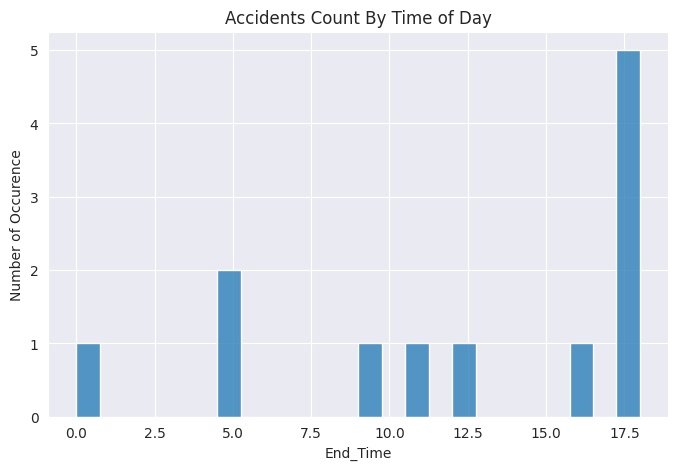

In [78]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("End_Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

In [79]:
del df1['Start_Time']
del df1['End_Time']

In [80]:
%matplotlib inline
import os

In [82]:
df.shape

(10026, 49)

In [83]:
df_num.shape

(12, 16)

In [84]:
df1.groupby('Severity').count()['IDD']

,IDD
Severity,
2,11
3,1


<Axes: xlabel='Severity', ylabel='Start_Lat'>

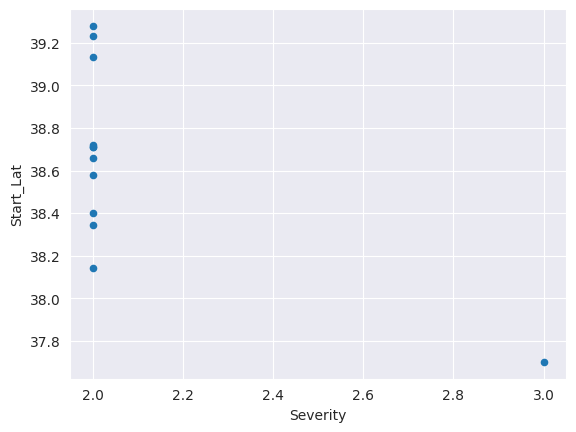

In [85]:
df_num.plot(kind='scatter', y='Start_Lat', x='Severity')

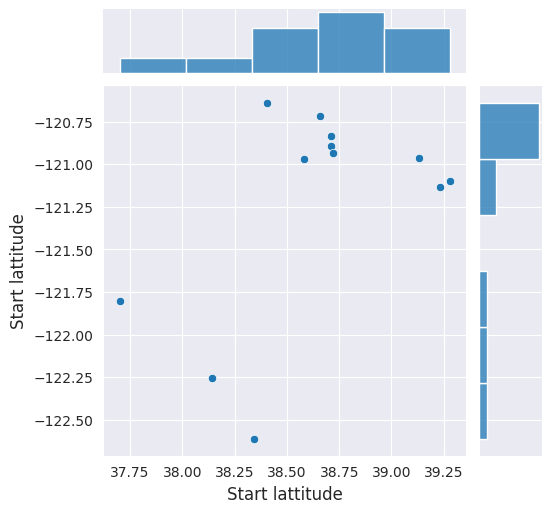

In [87]:
sns.jointplot(x=df_num.Start_Lat.values , y=df_num.Start_Lng.values,height=5)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start lattitude', fontsize=12)
plt.show()